In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
# Setting up the base paths
base_train_path = "../Data/Alzheimerr/train_set/"
base_test_path = "../Data/Alzheimerr/test_set/"

# Let's see what categories we have
categories = os.listdir(base_train_path)
print("Detected categories:", categories)

Detected categories: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [3]:
# This creates a "rulebook" for how to process the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# This actually goes into the folders and grabs the images
train_data = train_datagen.flow_from_directory(
    base_train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    base_test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 7200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


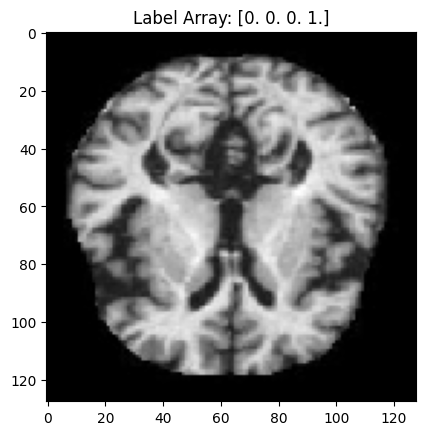

In [4]:
# Pull one "batch" of 32 images
images, labels = next(train_data)

# Show the first image in the batch
plt.imshow(images[0])
plt.title(f"Label Array: {labels[0]}")
plt.show()

In [5]:
# Print the mapping
class_map = train_data.class_indices
print("Class Mapping:", class_map)

Class Mapping: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [8]:
import json
# Use 'train_data' if that's what you named it in Cell 3
class_dict = train_data.class_indices 
with open('../Outputs/class_mapping.json', 'w') as f:
    json.dump(class_dict, f)
print("Saved!")

Saved!
